# Module 5-2: MnistData Class Implementation

This notebook implements the `MnistData` class, along with the softmax function, and demonstrates the functionality of various components.

In [6]:
import numpy as np
import os
import gzip
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

class MnistData:
    def __init__(self):
        self.train_images = None
        self.train_labels = None
        self.test_images = None
        self.test_labels = None
        self.dataset_path = './mnist.pkl'
        self._init_dataset()

    def _download(self, url, filename):
        """ Placeholder function for downloading dataset files """
        print(f"Placeholder: Would download {filename} from {url}")

    def _download_all(self):
        """ Placeholder function for downloading all dataset files """
        print("Placeholder: Would download all MNIST files")
        # Keras takes care of downloading, so we don't need to actually implement this.

    def _load_images(self, filename):
        """ Placeholder for loading images from a local file (if not using Keras) """
        print(f"Placeholder: Would load images from {filename}")
        # Since we use Keras' built-in loader, this function is not needed.
        return np.zeros((60000, 784))  # Dummy return for illustration

    def _load_labels(self, filename):
        """ Placeholder for loading labels from a local file (if not using Keras) """
        print(f"Placeholder: Would load labels from {filename}")
        # Since we use Keras' built-in loader, this function is not needed.
        return np.zeros(60000)  # Dummy return for illustration

    def _create_dataset(self):
        """ Placeholder for creating the dataset from the downloaded files """
        print("Placeholder: Would create dataset by loading images and labels")
        self.train_images = self._load_images('train-images-idx3-ubyte.gz')
        self.train_labels = self._load_labels('train-labels-idx1-ubyte.gz')
        self.test_images = self._load_images('t10k-images-idx3-ubyte.gz')
        self.test_labels = self._load_labels('t10k-labels-idx1-ubyte.gz')
        with open(self.dataset_path, 'wb') as f:
            pickle.dump(((self.train_images, self.train_labels), (self.test_images, self.test_labels)), f)

    def _init_dataset(self):
        """ Initialize dataset by loading from Keras or loading local files """
        if not os.path.exists(self.dataset_path):
            print("Dataset not found locally, loading from Keras...")
            (self.train_images, self.train_labels), (self.test_images, self.test_labels) = mnist.load_data()
        else:
            print("Dataset found, loading dataset from file...")
            with open(self.dataset_path, 'rb') as f:
                (self.train_images, self.train_labels), (self.test_images, self.test_labels) = pickle.load(f)

    def load(self):
        """ Load the dataset in a flattened format for consistency """
        train_images_flat = self.train_images.reshape(-1, 28*28)
        test_images_flat = self.test_images.reshape(-1, 28*28)
        return (train_images_flat, self.train_labels), (test_images_flat, self.test_labels)

    def _change_one_hot_label(self, labels, num_classes=10):
        """ Convert labels to one-hot encoding """
        one_hot_labels = np.zeros((labels.size, num_classes))
        one_hot_labels[np.arange(labels.size), labels] = 1
        return one_hot_labels

    def show_image(self, dataset_type='train', index=0):
        """ Display an image and its label """
        if dataset_type == 'train':
            image = self.train_images[index]
            label = self.train_labels[index]
        else:
            image = self.test_images[index]
            label = self.test_labels[index]

        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.show()


## Testing the MnistData Class
Let's instantiate the class and load the dataset. We'll also display a sample image and label.

Dataset not found locally, loading from Keras...
Train data shape: (60000, 784), Train labels shape: (60000,)
Test data shape: (10000, 784), Test labels shape: (10000,)


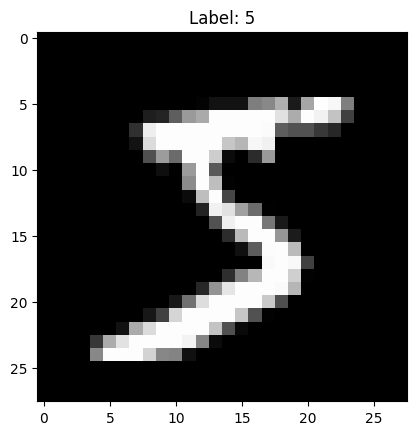

In [7]:
# Instantiate MnistData class and load the data
mnist_data = MnistData()
(train_images, train_labels), (test_images, test_labels) = mnist_data.load()
print(f"Train data shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Display a sample image and label
mnist_data.show_image('train', 0)


## Softmax Function
Let's implement a softmax function with overflow handling and test it with example inputs.

In [8]:
# Softmax function with overflow handling
def softmax(x):
    x = x - np.max(x)  # To avoid overflow
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Test softmax function
logits = np.array([10, 0.5, -2])
print("Softmax output:", softmax(logits))


Softmax output: [9.99919011e-01 7.48457677e-05 6.14371474e-06]


## One-Hot Encoding
Let's demonstrate how labels are converted to one-hot encoding.

In [9]:
# Example of one-hot encoding
labels = np.array([0, 3, 7])
one_hot_labels = mnist_data._change_one_hot_label(labels)
print("One-hot encoded labels:")
print(one_hot_labels)


One-hot encoded labels:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## Displaying Four Examples
We'll show two images from the training dataset and two images from the test dataset.

Train Image 1:


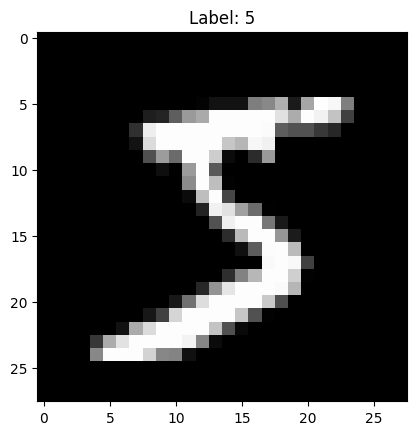

Train Image 2:


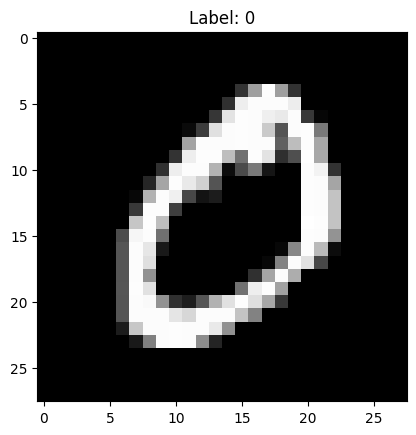

Test Image 1:


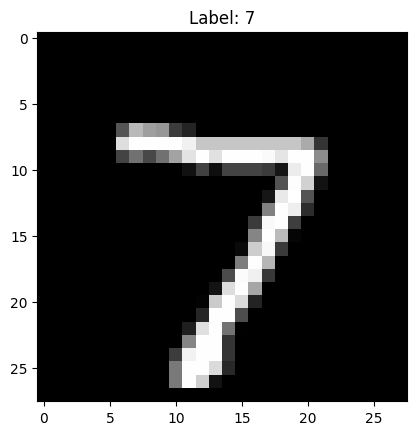

Test Image 2:


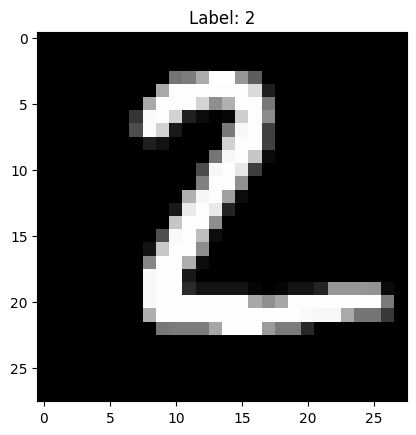

In [10]:
# Show two images from train dataset
print("Train Image 1:")
mnist_data.show_image('train', 0)
print("Train Image 2:")
mnist_data.show_image('train', 1)

# Show two images from test dataset
print("Test Image 1:")
mnist_data.show_image('test', 0)
print("Test Image 2:")
mnist_data.show_image('test', 1)
